<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual_ejercicios_sin_resolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Análisis Exploratorio Visual
Introducción al EDA (Exploratory Data Analysis) Visual.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)




# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

In [10]:
import pandas as pd
import numpy as np

# 02 Load Data
Recordemos, hemos visto 3 maneras de importar datos en Colab:

*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

### 0201 Importa dataframe Covid-19
Os he dejado en mi Google Drive: 
*   [este archivo](https://drive.google.com/file/d/1s7KH9Zke0b862uFtoGYZI2gEKgJPDDTY/view?usp=sharing) con casos Covid-19 confirmados para ciertos países. 
*   [este archivo](https://drive.google.com/drive/u/0/folders/1r-Qm0wF70NmWnUrZzVpjodBc2rT0lIPq) con muertes por Covid-19 confirmadas para esos mismos países. 

Para cada país, cada tabla contiene contiene:

*   X: Los casos/fallecimientos confirmados acumulados en el país X
*   X_REL: Los casos/fallecimientos confirmados acumulados en el país X por cada 100.000 habitantes. 
*   X_ult7: Los casos/fallecimientos confirmados en los últimos 7 días en el país X.
*   X_REL_ult7: Los casos/fallecimientos confirmados en los últimos 7 días en el país X por cada 100.000 habitantes.

Importa los datos del Covid como prefieras en dos dataframes: **df_casos_covid** y **df_muertes_covid** y modifica en ambos casos la columna fecha para que esté en un formato de tipo fecha.

In [11]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Casos_Clean.csv'
df_casos_covid = pd.read_csv(dir_archivo)
df_casos_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,548,0,0,0,0,0,0,1,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,643,0,0,0,0,0,0,1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,920,2,0,0,0,0,0,2,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,1406,3,0,0,0,0,0,2,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2075,3,0,0,0,0,0,5,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Muertes_Clean.csv'
df_muertes_covid = pd.read_csv(dir_archivo)
df_muertes_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,17,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,18,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,26,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,42,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,56,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_casos_covid.tail()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
367,2021-01-23,99047,3026320,2137691,2455185,624469,2499560,3617459,25016816,7.11,4518.44,2578.46,4063.41,6072.34,5341.34,5443.03,7657.72,1272.0,159551.0,99046.0,86452.0,85053.0,247396.0,260098.0,1232797.0,0.09,238.22,119.47,143.08,827.05,528.67,391.35,377.36
368,2021-01-24,99247,3044358,2147769,2466813,636190,2499560,3647463,25147891,7.13,4545.37,2590.61,4082.66,6186.32,5341.34,5488.18,7697.84,1308.0,140383.0,97640.0,85536.0,86389.0,247396.0,251504.0,1186468.0,0.10,209.60,117.77,141.57,840.05,528.67,378.43,363.18
369,2021-01-25,99402,3048598,2154656,2475372,643113,2593382,3669658,25298986,7.14,4551.70,2598.92,4096.82,6253.64,5541.82,5521.58,7744.09,1238.0,140887.0,95274.0,85270.0,86610.0,256931.0,236164.0,1194958.0,0.09,210.35,114.92,141.12,842.20,549.03,355.35,365.78
370,2021-01-26,99541,3070458,2164043,2485956,653878,2629817,3689746,25445583,7.15,4584.34,2610.24,4114.34,6358.32,5619.68,5551.80,7788.97,1218.0,139408.0,92428.0,85358.0,86920.0,259075.0,222897.0,1164571.0,0.09,208.14,111.48,141.27,845.21,553.62,335.38,356.48
371,2021-01-27,99655,3097374,2179679,2501147,668951,2670102,3715054,25598061,7.16,4624.53,2629.10,4139.48,6504.89,5705.77,5589.88,7835.64,1111.0,139827.0,79061.0,86981.0,87346.0,257784.0,209300.0,1134470.0,0.08,208.77,95.36,143.96,849.36,550.86,314.92,347.26


In [15]:
# Cambiamos el formato de la columna 'Date'
df_casos_covid['Date'] = pd.to_datetime(
    df_casos_covid['Date'], format='%Y-%m-%d', errors='ignore')

df_muertes_covid['Date'] = pd.to_datetime(
    df_muertes_covid['Date'], format='%Y-%m-%d', errors='ignore')

### 0202 Importa dataframe SP500
Como en la clase anterior, deberéis cargar [este dataset](https://drive.google.com/file/d/1OfTfaCTGtiS27G-uNpDsRgHqFUIaZ3XP/view?usp=sharing). Recoge la evolución diaria histórica del [SP&500](https://en.wikipedia.org/wiki/S%26P_500_Index). 

Impórtalo como prefieras en un dataframe df_sp500 y modifica la columna con la fecha a formato fecha.

In [16]:
# Generamos un objeto para subir el archivo
from google.colab import files
uploaded = files.upload()

Saving sp500.csv to sp500 (1).csv


In [17]:
# Convertimos los bytes a formato tabular
import io
buffer_io = io.BytesIO(uploaded['sp500.csv'])


# Cargamos en un dataframe
df_sp500 = pd.read_csv(buffer_io)
df_sp500.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0


In [18]:
# Cambiamos el formato de la columna 'Date'
df_sp500['Date'] = pd.to_datetime(
    df_sp500['Date'], format='%Y-%m-%d', errors='ignore')

### 0203 Importa dataframe Fifa19
En la clase anterior limpiamos el dataframe con datos de los jugadores del fifa y lo guardamos en nuestros drive ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) puedes encontrar mi copia). Importa este dataset ya limpiado en un dataframe llamado **df_fifa19**.


In [19]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Fifa19_Clean.csv'
df_fifa19 = pd.read_csv(dir_archivo)
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168,102000000.0,355000.0,196400000.0,180.34


# 02 Matplotlib
[Matplotlib](https://matplotlib.org/index.html) es la principal librería de python para visualizar datos. Es extensa, flexible y robusta. El punto de partida perfecto para visualizar datos.

Veamos cómo se utiliza.

In [23]:
# Se suele importar como plt
import matplotlib.pyplot as plt

## 0201 plt.plot()
plt.[plot()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) es la función básica de Pyplot.

In [24]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


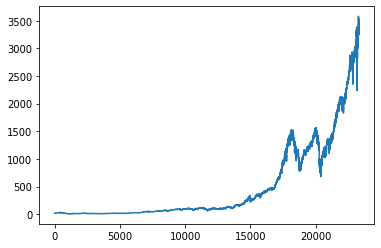

In [25]:
# Un solo argumento:
plt.plot(df_sp500['Close'])

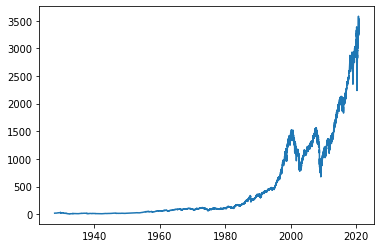

In [26]:
# Dos argumentos: x, y
plt.plot(df_sp500['Date'], df_sp500['Close'])

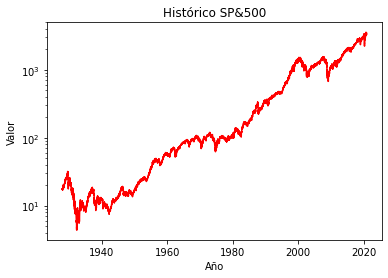

In [27]:
# Añadimos detalles
plt.plot(df_sp500['Date'], df_sp500['Close'], color='red')
plt.title('Histórico SP&500')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.yscale('log')
plt.show()

### 020101 EJEMPLO: Evolución Covid
Visualiza la evolución de casos acumulados de los países que contiene el dataframe.

Veamos varias visualizaciones útiles:

In [28]:
df_casos_covid.head(3)

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,548,0,0,0,0,0,0,1,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,643,0,0,0,0,0,0,1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,920,2,0,0,0,0,0,2,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


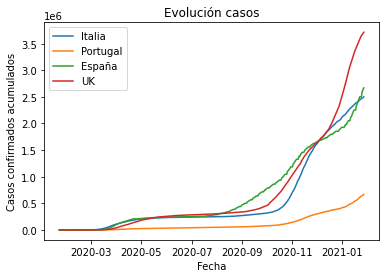

In [29]:
# Simplemente se añaden
plt.plot(df_casos_covid['Date'], df_casos_covid['Italy'], label='Italia')
plt.plot(df_casos_covid['Date'], df_casos_covid['Portugal'], label='Portugal')
plt.plot(df_casos_covid['Date'], df_casos_covid['Spain'], label='España')
plt.plot(df_casos_covid['Date'], df_casos_covid['UK'], label='UK')
plt.title('Evolución casos')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados acumulados')
plt.legend()
plt.show()

In [30]:
df_casos_covid.columns

Index(['Date', 'China', 'France', 'Germany', 'Italy', 'Portugal', 'Spain',
       'UK', 'US', 'China_REL', 'France_REL', 'Germany_REL', 'Italy_REL',
       'Portugal_REL', 'Spain_REL', 'UK_REL', 'US_REL', 'China_ult7',
       'France_ult7', 'Germany_ult7', 'Italy_ult7', 'Portugal_ult7',
       'Spain_ult7', 'UK_ult7', 'US_ult7', 'China_REL_ult7', 'France_REL_ult7',
       'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7',
       'Spain_REL_ult7', 'UK_REL_ult7', 'US_REL_ult7'],
      dtype='object')

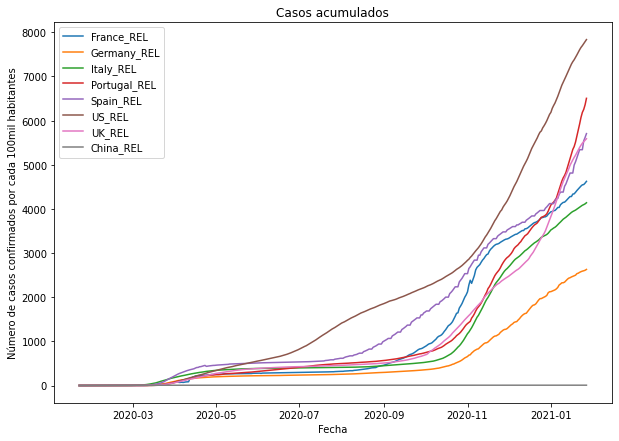

In [31]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais)
plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

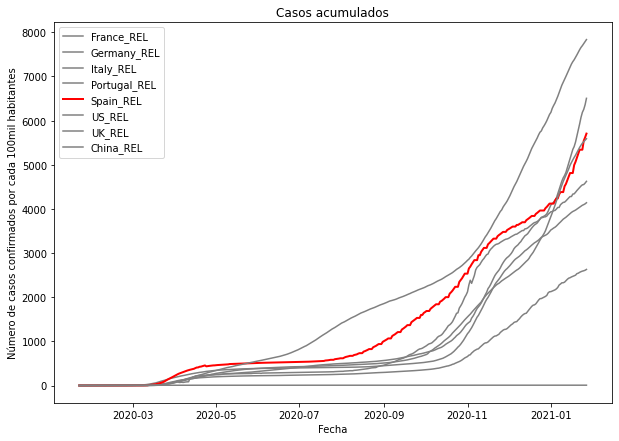

In [32]:
# En un loop definiendo los colores
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

### 020102 EJERCICIO: Evolución Covid II
Muestra el número de casos en los últimos 7 días por cada 100.000 habitantes.

Muestra a China en azul, España en rojo y con anchura de 3, a US en negro, y el resto de países en gris.


## 0202 plt.bar()
plt.[bar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) es la función de Pyplot para visualizar barras.

plt.[barh()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh) hace lo mismo pero con barras horizontales.



In [33]:
cols = ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']

ult_fila = df_casos_covid.index[-1]

serie_casos_rel = df_casos_covid.loc[ult_fila, cols]
serie_casos_rel

France_REL      4624.53
Germany_REL      2629.1
Italy_REL       4139.48
Portugal_REL    6504.89
Spain_REL       5705.77
US_REL          7835.64
UK_REL          5589.88
China_REL          7.16
Name: 371, dtype: object

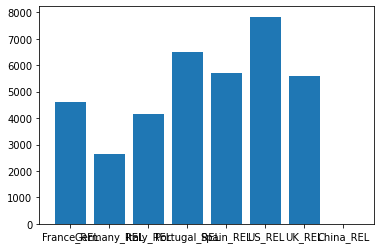

In [34]:
# Básico
plt.bar(x=serie_casos_rel.index, height=serie_casos_rel.values)
plt.show()

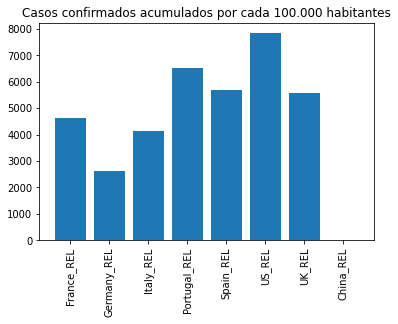

In [35]:
# Retoques
plt.bar(x=serie_casos_rel.index, height=serie_casos_rel.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.xticks(rotation=90)
plt.show()

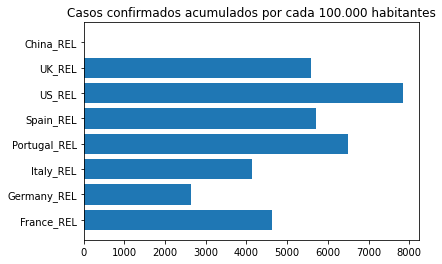

In [36]:
# En horizontal
plt.barh(y=serie_casos_rel.index, width=serie_casos_rel.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

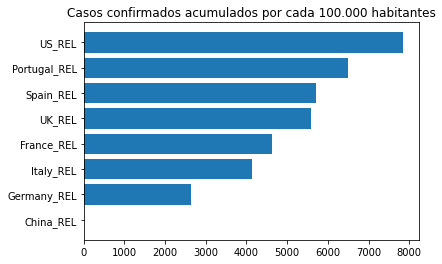

In [37]:
# Ordenado
serie_casos_rel = serie_casos_rel.sort_values()

plt.barh(y=serie_casos_rel.index, width=serie_casos_rel.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

### 020201 EJEMPLO: Jugadores diestros/zurdos
Los gráficos de barras suelen ser una muy buena idea para mostrar la distribución de variables categóricas.

Volviendo a nuestro dataset del fifa 19. Vamos a mostrar en un gráfico de barras cuántos jugadores diestros y zurdos hay.

La función value_counts() será muy útil.

In [38]:
# Recordemos lo que devuelve la función value_counts() aplicada sobre una serie
df_fifa19['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

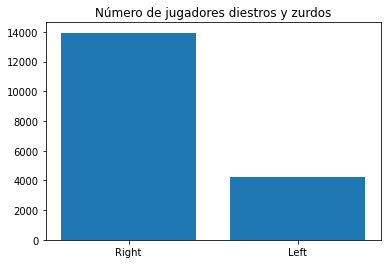

In [39]:
# Guardamos el resultado del value_counts(), que es un objeto serie
serie_pie_dominante = df_fifa19['Preferred Foot'].value_counts()

# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

#### Nota: Gráfico de tarta
Este es un buen ejemplo de un análisis en donde un gráfico de tarta no sería una mala opción. Las categorías zurdo/diestro son solo dos, son parte de un todo (jugadores totales) y es interesante saber cuál de las dos es mayoría.

En pyplot, el gráfico de tarta se realiza con plt.[pie](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html).

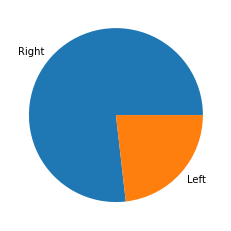

In [42]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

### 020202 EJERCICIO: Jugadores por nacionalidad
Muestra en un gráfico de barras horizontales los fallecidos por covid relativos (por cada 100.000 habitantes) de cada país acumulados desde el principio de la pandemia, ordenados de mayor a menor. 

## 0203 plt.scatter()
Con plt.[scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) se realizan diagramas de dispersión (scatter plots).

In [43]:
df_fifa19.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96


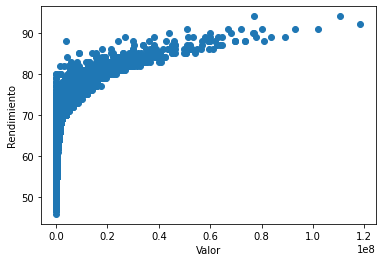

In [44]:
# Veamos la asociación entre valor y rendimiento
plt.scatter(df_fifa19['Value_€'],df_fifa19['Overall'])
plt.xlabel('Valor')
plt.ylabel('Rendimiento')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


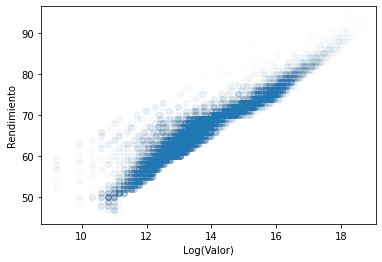

In [45]:
# alpha nos permite ver densidades
plt.scatter(np.log(df_fifa19['Value_€']), 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Log(Valor)')
plt.ylabel('Rendimiento')
plt.show()

El diagrama de dispersión de arriba muestra una clara asociación entre las variables valor y rendimiento. En este caso, parece claro que esto es porque el rendimiento influye directamente sobre el valor del jugador.

Pero hay otras razones por las que dos variables podrían estar correlacionadas sin que una cause a la otra. Hablaremos de esto en la próxima clase.

Volviendo a la asociación, esta es la pinta de dos variables que no tienen una gran asociación entre ellas:

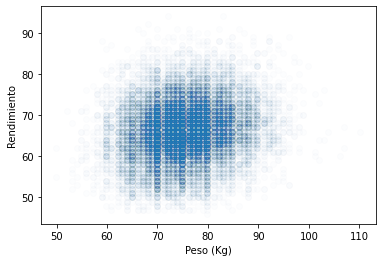

In [46]:
# el peso (entre atletas en su peso ideal) y el rendimiento no debería estar muy asociado
plt.scatter(df_fifa19['Weight_kg'], 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Peso (Kg)')
plt.ylabel('Rendimiento')
plt.show()

### 020301 EJERCICIO: Asociación edad/rendimiento
Muestra la asociación entre las variables edad (x) y rendimiento (y). Primero hazlo para todos los jugadores.

Luego, intenta un nuevo gráfico donde superpongas dos diagramas de dispersión: el primero, de nuevo, incluyendo todos los jugadores; el segundo, en naranja, se centrará en los jugadores españoles.

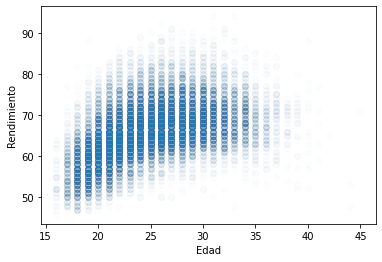

In [47]:
# Primero visualiza simplemente la asociación entre las dos variables
# diagrama de dispersión
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01)
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

In [48]:
# filtro jugadores españoles
filtro_españoles = df_fifa19['Nationality']=='Spain'

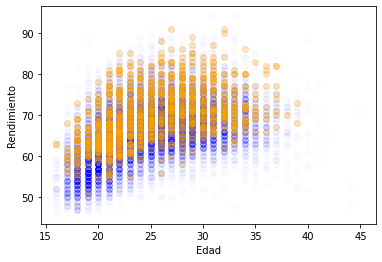

In [49]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

## 0204 plt.hist()
Los histogramas son una herramienta muy útil para visualizar la distribución de una variable continua.

En Pyplot, se utiliza plt.[hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

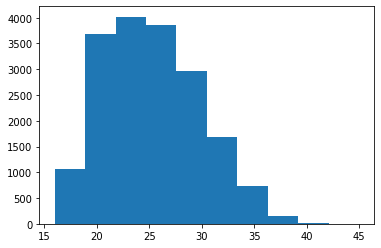

In [50]:
# distribución de la variable edad
plt.hist(df_fifa19['Age'])
plt.show()

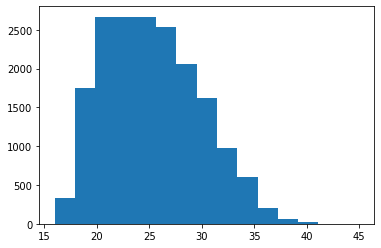

In [51]:
# 15 contenedores
plt.hist(df_fifa19['Age'], bins=15)
plt.show()

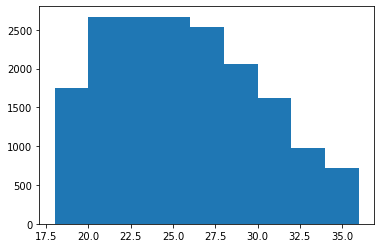

In [52]:
# contenedores personalizados
plt.hist(df_fifa19['Age'], bins=[18,20,22,24,26,28,30,32,34,36])
plt.show()

### 020301 EJERCICIO: Distribución de Overall
Muestra la distribución de la variable rendimiento (overall) usando 20 bins.

## 0205 Uso de fig y ax
Hasta ahora hemos definido una gráfica añadiendo información directamente sobre plt y luego mostrándolo con plt.show().

Pero esto nos daría problemas si quisiéramos visualizar dos gráficos distintos sobre una misma imagen. Cómo podríamos hacerlo?

Utilizando los objetos [fig y ax](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca). 

### 020501 plt.subplots()
plt.[subplots()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) genera una figura vacía y devuelve un tuple ([no sabes lo que es un tuple?](https://www.programiz.com/python-programming/tuple)):

(figura, ejes).

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b08c8e4a8>)

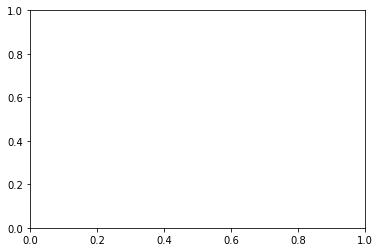

In [54]:
plt.subplots()

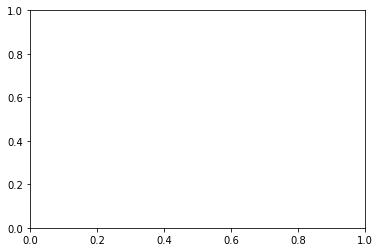

In [55]:
fig, ax = plt.subplots()

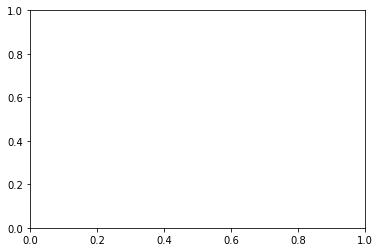

In [56]:
fig

In [57]:
ax

Hemos creado dos variables: fig y ax que representan la imagen y el gráfico respectivamente. 

**Fig** es, conceptualmente, el objeto de la imagen. Podemos hacer la imagen más o menos grande o configurar la estética.
**Ax** es una representación datos de manera visual: son los datos en forma de gráfico de líneas, de barras, etc. Es, en definitiva, un gráfico. 

Una misma figura puede tener varios ax. En cuanto a la nomenclatura, podríamos llamarle de otra forma pero fig y ax es la convención (como importar pandas como pd, o seaborn como sns) así que mejor cumpliremos con los estándares típicos.

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b08a038d0>,
       dtype=object))

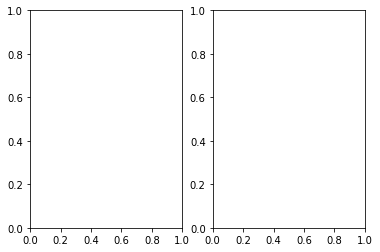

In [58]:
# También podemos generar imágenes (fig) con más de un gráfico (ax)
plt.subplots(nrows=1, ncols=2)

(<Figure size 432x288 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b08ae5ac8>,
       dtype=object))

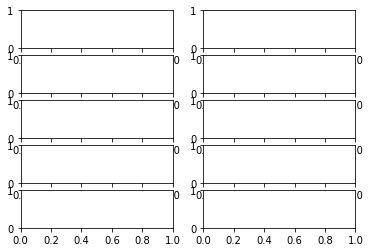

In [59]:
# O con muchos más. Más adelante veremos cómo utilizarlos
plt.subplots(nrows=5, ncols=2)

### 020502 ax.plot()
Una vez hemos definido el número de **ax**s que va a tener nuestra **fig** podemos definir cada uno de los gráficos (ax).

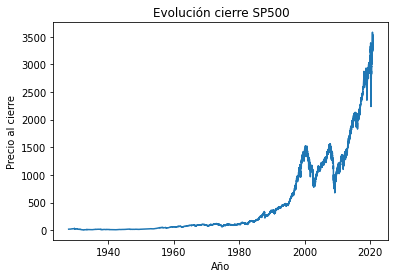

In [60]:
# Con plt.plot()
plt.plot(df_sp500['Date'], df_sp500['Close'])
plt.title('Evolución cierre SP500')
plt.xlabel('Año')
plt.ylabel('Precio al cierre')
plt.show()

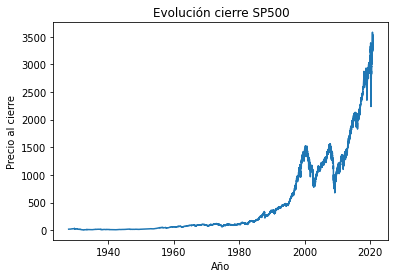

In [61]:
# Conf fig, ax
fig, ax = plt.subplots()
ax.plot(df_sp500['Date'], df_sp500['Close'])
ax.set(title='Evolución cierre SP500', 
       xlabel='Año', 
       ylabel='Precio al cierre')
plt.show()

#### EJEMPLO: Fallecimientos Covid
Representamos la evolución de fallecimientos relativa acumulada y relativa en los últimos 7 días en una misma imagen.

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b089cc470>,
       dtype=object))

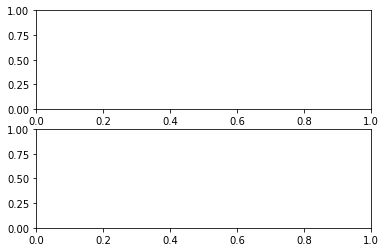

In [62]:
# Vamos a generar dos gráficas en una misma imagen (una encima de la otra)
plt.subplots(nrows=2, ncols=1)

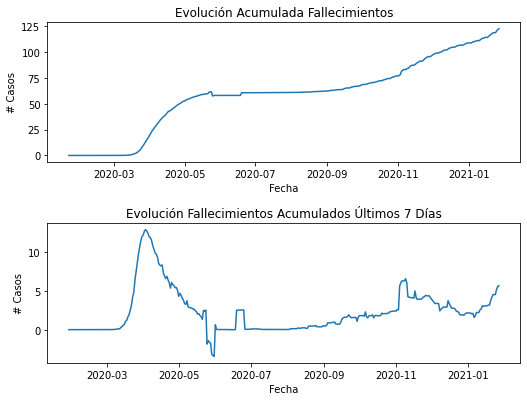

In [63]:
# Generamos las variables (ahora tenemos dos ax)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=2)
fig.set_size_inches(8,6)
ax1.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL'])
ax1.set(title='Evolución Acumulada Fallecimientos', 
        xlabel='Fecha', 
        ylabel='# Casos')
ax2.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL_ult7'])
ax2.set(title='Evolución Fallecimientos Acumulados Últimos 7 Días', 
        xlabel='Fecha', 
        ylabel='# Casos')
plt.show()

#### EJERCICIO Covid Comparación Países
Vamos a realizar una imagen con dos gráficos (2 columnas).

En ambos mostraremos la comparación de fallecidos en los últimos 7 días. En uno con una gráfico de barras horizontales, en otro con una mala elección: un gráfico de tarta.

Aprovecharemos para comprobar por qué es una mala elección:

### 020503 ax.twinx()
ax.[twinx](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.twinx.html) y ax.[twiny](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.twiny.html) crean un nuevo ax que comparte el eje x o y (respectivamente) con el original.

Esto nos permitirá realizar gráficos de distinto tipo sobre un mismo eje.


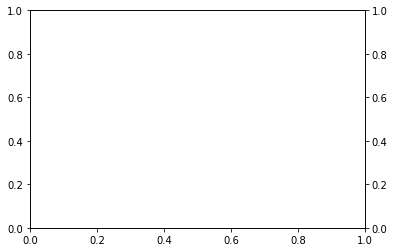

In [64]:
# Conf fig, ax
fig, ax_a = plt.subplots()
ax_b = ax_a.twinx()
display(ax_b)
display(ax_a)

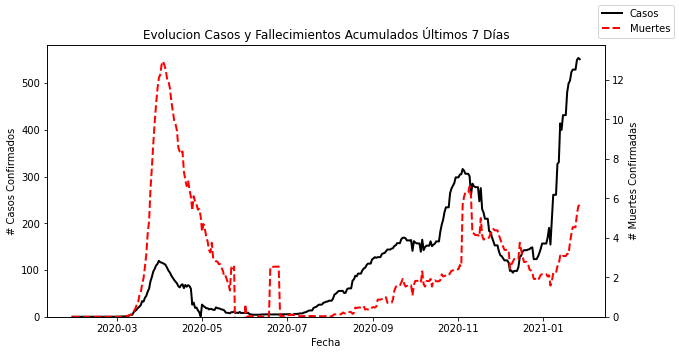

In [65]:
# Conf fig, ax
fig, ax_a = plt.subplots()
ax_b = ax_a.twinx()

# Configuramos la figura
fig.set_size_inches(10,5)

# Generamos los ax
ax_a.plot(df_casos_covid['Date'], df_casos_covid['Spain_REL_ult7'],
          color = 'black', linewidth = 2, label='Casos')
ax_a.set(title='Evolucion Casos y Fallecimientos Acumulados Últimos 7 Días', 
         xlabel='Fecha', 
         ylabel='# Casos Confirmados')
ax_a.set_ylim(bottom=0)
ax_b.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL_ult7'], 
          color='red', linewidth = 2, linestyle='dashed', label='Muertes')
ax_b.set(ylabel='# Muertes Confirmadas')
ax_b.set_ylim(bottom=0)

# Añadimos la layenda
fig.legend()
plt.show()

# 03 Seaborn
[Seaborn](https://seaborn.pydata.org/) es una librería de Python de visualización basada en matplolib.

La utilizaremos para mejorar la estética de nuestros gráficos y para realizar ciertas mejoras sobre los gráficos básicos de matplolib.




In [66]:
# Se suele importar como sns
import seaborn as sns

## 0301 sns.set()
La función sns.[set()](https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set) modifica la estética de los gráficos de matplotlib.pyplot a la estándar de seaborn. 

Os recomiendo ejecutarla antes de generar gráficos con matplotlib.pyplot. De hecho, veamos los gráficos anteriormente generados ahora realizados tras haber ejecutado sns.set().

In [67]:
# Este comando hará tus gráficos más profesionales
sns.set()

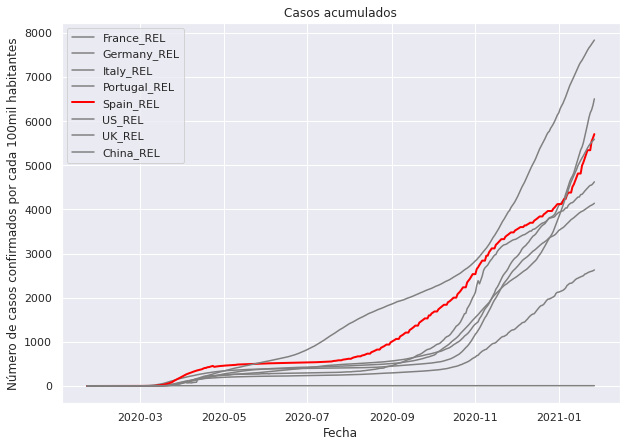

In [68]:
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

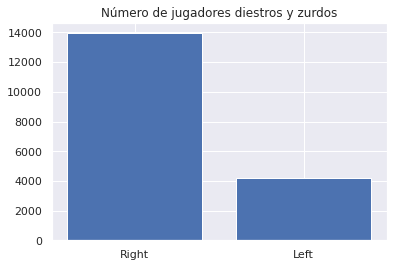

In [69]:
# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

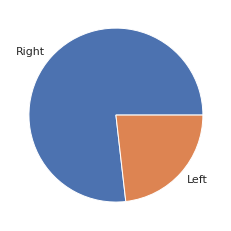

In [70]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

In [71]:
# Visualizamos el resultado
plt.barh(y=serie_nacionalidad.index[::-1], width=serie_nacionalidad.values[::-1])
plt.title('Número de jugadores por nacionalidad')
plt.show()

NameError: ignored

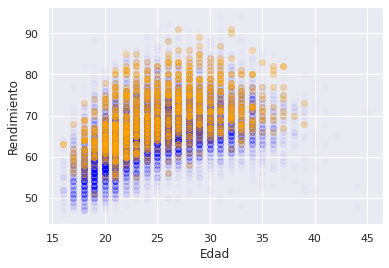

In [72]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

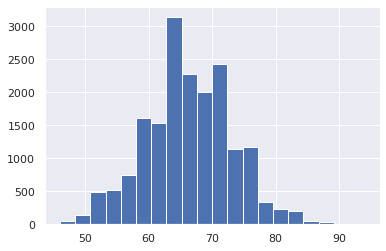

In [73]:
plt.hist(df_fifa19['Overall'], bins=20)
plt.show()

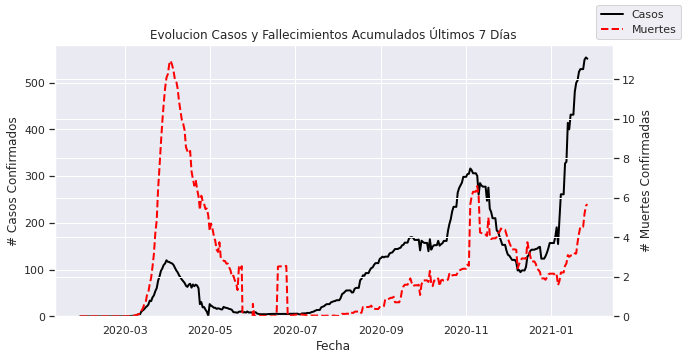

In [74]:
# Conf fig, ax
fig, ax_a = plt.subplots()
ax_b = ax_a.twinx()

# Configuramos la figura
fig.set_size_inches(10,5)

# Generamos los ax
ax_a.plot(df_casos_covid['Date'], df_casos_covid['Spain_REL_ult7'],
          color = 'black', linewidth = 2, label='Casos')
ax_a.set(title='Evolucion Casos y Fallecimientos Acumulados Últimos 7 Días', 
         xlabel='Fecha', 
         ylabel='# Casos Confirmados')
ax_a.set_ylim(bottom=0)
ax_b.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL_ult7'], 
          color='red', linewidth = 2, linestyle='dashed', label='Muertes')
ax_b.set(ylabel='# Muertes Confirmadas')
ax_b.set_ylim(bottom=0)

# Añadimos la layenda
fig.legend()
plt.show()

Se pueden definir muchos temas distintos utilizando [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme).

## 0302 Otras ventajas de seaborn
Además de sns.set(), seaborn puede ser útil en cuanto a que facilita realizar ciertas gráficas, más complejas y especializadas.

Podéis ver algunos ejemplos [aquí](https://seaborn.pydata.org/examples/index.html) y los comandos a emplear [aquí](https://seaborn.pydata.org/api.html).

Veremos algún ejemplo en los ejercicios.


# 04 Pandas-Profiling
Pandas-Profiling es una librería que realiza informes EDA interactivos y de manera automática sobre un dataframe.

Veamos cómo utilizarla.

## 0401 Instalar e importar
No es una librería tan habitual, por lo que no está incorporada en Colab. Primero tenemos que instalarla, y luego, sí, la importamos como hemos venido haciendo con otras:

In [75]:
# Instalamos pandas-profiling
! pip install -U pandas-profiling

     |████████████████████████████████| 245kB 6.3MB/s 
     |████████████████████████████████| 604kB 6.5MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 3.1MB 13.0MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 296kB 45.2MB/s 
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=a6c39c4e00fe618be0620cce315c175db568f331c8e183687ed572acb59e69e6
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=c0d1c78bccc25ab85b57ddfb13602536de2ea4485e31836539eeb9bf903511fb
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you

In [76]:
# Importamos solo la función ProfileReport (la verdaderamente importante)
from pandas_profiling import ProfileReport

## 0402 Se define el report
Definimos el informe que queremos genrar, simplemente pasándole a la función el dataframe y el título del informe.

In [77]:
profile_sp500 = ProfileReport(df_sp500, 
                               title='SP500', 
                               html={'style':{'full_width':False}})

In [78]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€',  
        'Club', 'Preferred Foot'
        ]
len(df_fifa19)      

18159

In [79]:
profile_fifa19 = ProfileReport(df_fifa19.loc[:5000, cols], 
                               title='Informe Fifa 19', 
                               html={'style':{'full_width':False}})

## 0403 Generamos y guardamos
Generamos y guardamos los informes.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
profile_sp500.to_file(output_file="/content/drive/My Drive/Data/SP500 Informe EDA.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_fifa19.to_file(output_file="/content/drive/My Drive/Data/Fifa19 Informe EDA.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]